# 1. Import lib


In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.float_format", "{:.1f}".format)

# Add data


In [111]:
df = pd.read_csv('movies_data_processed.csv')
df

,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
0,Attack on Titan,"Action Epic, Adult Animation, Anime, Shōnen, S...",TV Series,9.1,591000.0,NaN,2013.0,NaN,NaN,Japan,https://www.imdb.com/title/tt2560140/?ref_=sr_...,NaN,Success
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,United States,https://www.imdb.com/title/tt30788842/?ref_=sr...,-0.0,Fail
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.4,Success
3,The Equalizer,"Cop Drama, Police Procedural, Action, Crime, D...",TV Series,5.6,19000.0,NaN,2021.0,NaN,NaN,United States,https://www.imdb.com/title/tt11242246/?ref_=sr...,NaN,Fail
4,Goosebumps,"Teen Horror, Action, Adventure, Comedy, Drama,...",TV Series,6.7,15000.0,NaN,2023.0,NaN,NaN,"United States, Canada, France",https://www.imdb.com/title/tt17720272/?ref_=sr...,NaN,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,Chuka,Western,Movie,6.3,1100.0,NaN,1967.0,NaN,NaN,United States,https://www.imdb.com/title/tt0061477/?ref_=sr_...,NaN,Fail
7990,Unforgiven,"Period Drama, Tragedy, Drama, Western",Movie,8.2,451000.0,85.0,1992.0,159167799.0,14400000.0,United States,https://www.imdb.com/title/tt0105695/?ref_=sr_t_3,10.1,Success
7991,The Duel,"Drama, Western",Movie,5.8,12000.0,42.0,2016.0,20672.0,10000000.0,United States,https://www.imdb.com/title/tt2436682/?ref_=sr_...,-1.0,Fail
7992,Calamity Jane,"Classic Musical, Musical, Romance, Western",Movie,7.2,11000.0,74.0,1953.0,7150.0,NaN,United States,https://www.imdb.com/title/tt0045591/?ref_=sr_...,NaN,Success


In [112]:
df.head()

,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
0,Attack on Titan,"Action Epic, Adult Animation, Anime, Shōnen, S...",TV Series,9.1,591000.0,NaN,2013.0,NaN,NaN,Japan,https://www.imdb.com/title/tt2560140/?ref_=sr_...,NaN,Success
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,United States,https://www.imdb.com/title/tt30788842/?ref_=sr...,-0.0,Fail
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.4,Success
3,The Equalizer,"Cop Drama, Police Procedural, Action, Crime, D...",TV Series,5.6,19000.0,NaN,2021.0,NaN,NaN,United States,https://www.imdb.com/title/tt11242246/?ref_=sr...,NaN,Fail
4,Goosebumps,"Teen Horror, Action, Adventure, Comedy, Drama,...",TV Series,6.7,15000.0,NaN,2023.0,NaN,NaN,"United States, Canada, France",https://www.imdb.com/title/tt17720272/?ref_=sr...,NaN,Fail


In [113]:
df.isnull().sum()

name               0
genres             0
type               0
rating           244
no_of_votes      244
meta_score      4348
release_date      58
gross           4461
budget          4887
countries         36
url                0
ROI             5140
result             0
dtype: int64

In [114]:
df.dtypes

name             object
genres           object
type             object
rating          float64
no_of_votes     float64
meta_score      float64
release_date    float64
gross           float64
budget          float64
countries        object
url              object
ROI             float64
result           object
dtype: object

Điều kiện để dánh giá phim tốt <br>
rating > 7.5 <br>
meta_score > 72 <br>

# 2. Phân tích data theo địa lý và quốc gia sản xuất (Phần 3)

In [115]:
df

,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
0,Attack on Titan,"Action Epic, Adult Animation, Anime, Shōnen, S...",TV Series,9.1,591000.0,NaN,2013.0,NaN,NaN,Japan,https://www.imdb.com/title/tt2560140/?ref_=sr_...,NaN,Success
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,United States,https://www.imdb.com/title/tt30788842/?ref_=sr...,-0.0,Fail
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.4,Success
3,The Equalizer,"Cop Drama, Police Procedural, Action, Crime, D...",TV Series,5.6,19000.0,NaN,2021.0,NaN,NaN,United States,https://www.imdb.com/title/tt11242246/?ref_=sr...,NaN,Fail
4,Goosebumps,"Teen Horror, Action, Adventure, Comedy, Drama,...",TV Series,6.7,15000.0,NaN,2023.0,NaN,NaN,"United States, Canada, France",https://www.imdb.com/title/tt17720272/?ref_=sr...,NaN,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,Chuka,Western,Movie,6.3,1100.0,NaN,1967.0,NaN,NaN,United States,https://www.imdb.com/title/tt0061477/?ref_=sr_...,NaN,Fail
7990,Unforgiven,"Period Drama, Tragedy, Drama, Western",Movie,8.2,451000.0,85.0,1992.0,159167799.0,14400000.0,United States,https://www.imdb.com/title/tt0105695/?ref_=sr_t_3,10.1,Success
7991,The Duel,"Drama, Western",Movie,5.8,12000.0,42.0,2016.0,20672.0,10000000.0,United States,https://www.imdb.com/title/tt2436682/?ref_=sr_...,-1.0,Fail
7992,Calamity Jane,"Classic Musical, Musical, Romance, Western",Movie,7.2,11000.0,74.0,1953.0,7150.0,NaN,United States,https://www.imdb.com/title/tt0045591/?ref_=sr_...,NaN,Success


## Phân tích tổng quan:


### Quốc gia có doanh thu cao nhất

In [116]:
# Tách các quốc gia (nếu có nhiều quốc gia trong một ô)
df['countries'] = df['countries'].str.split(', ')
df = df.explode('countries')

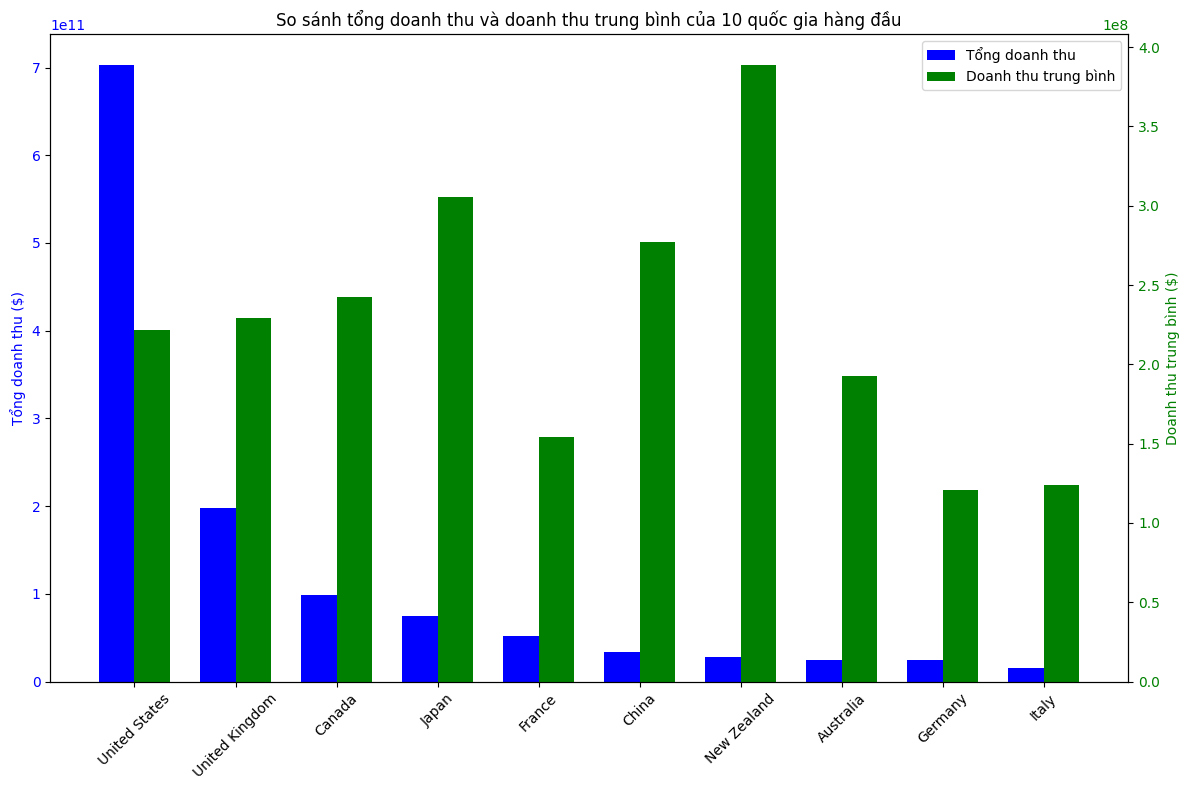


Thống kê chi tiết theo quốc gia:
                Tổng doanh thu  Doanh thu trung bình  Số lượng phim
countries                                                          
United States   702627797223.0           221509393.8           3172
United Kingdom  197591484358.0           228958846.3            863
Canada           98654798297.0           242395081.8            407
Japan            74834730220.0           305447878.4            245
France           52536721312.0           154066631.4            341
...                        ...                   ...            ...
Libya                      0.0                   NaN              0
Pakistan                   0.0                   NaN              0
Rwanda                     0.0                   NaN              0
Tanzania                   0.0                   NaN              0
Swaziland                  0.0                   NaN              0

[100 rows x 3 columns]


In [119]:
# Tạo DataFrame tổng hợp
country_stats = df.groupby('countries').agg({
    'gross': ['sum', 'mean', 'count']
}).round(2)

# Đổi tên cột cho dễ đọc
country_stats.columns = ['Tổng doanh thu', 'Doanh thu trung bình', 'Số lượng phim']
country_stats = country_stats.sort_values('Tổng doanh thu', ascending=False)

# Tạo biểu đồ cột đôi với 2 trục y
fig, ax1 = plt.subplots(figsize=(12, 8))

# Lấy 10 quốc gia có doanh thu cao nhất
top_10_countries = country_stats.head(10)

# Trục y bên trái - Tổng doanh thu
x = np.arange(len(top_10_countries))
width = 0.35
rects1 = ax1.bar(x - width/2, top_10_countries['Tổng doanh thu'], 
                width, label='Tổng doanh thu', color='blue')
ax1.set_ylabel('Tổng doanh thu ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Trục y bên phải - Doanh thu trung bình
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, top_10_countries['Doanh thu trung bình'],
                width, label='Doanh thu trung bình', color='green')
ax2.set_ylabel('Doanh thu trung bình ($)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Tùy chỉnh biểu đồ
ax1.set_title('So sánh tổng doanh thu và doanh thu trung bình của 10 quốc gia hàng đầu')
ax1.set_xticks(x)
ax1.set_xticklabels(top_10_countries.index, rotation=45)

# Thêm legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

# In bảng thống kê
print("\nThống kê chi tiết theo quốc gia:")
print(country_stats)

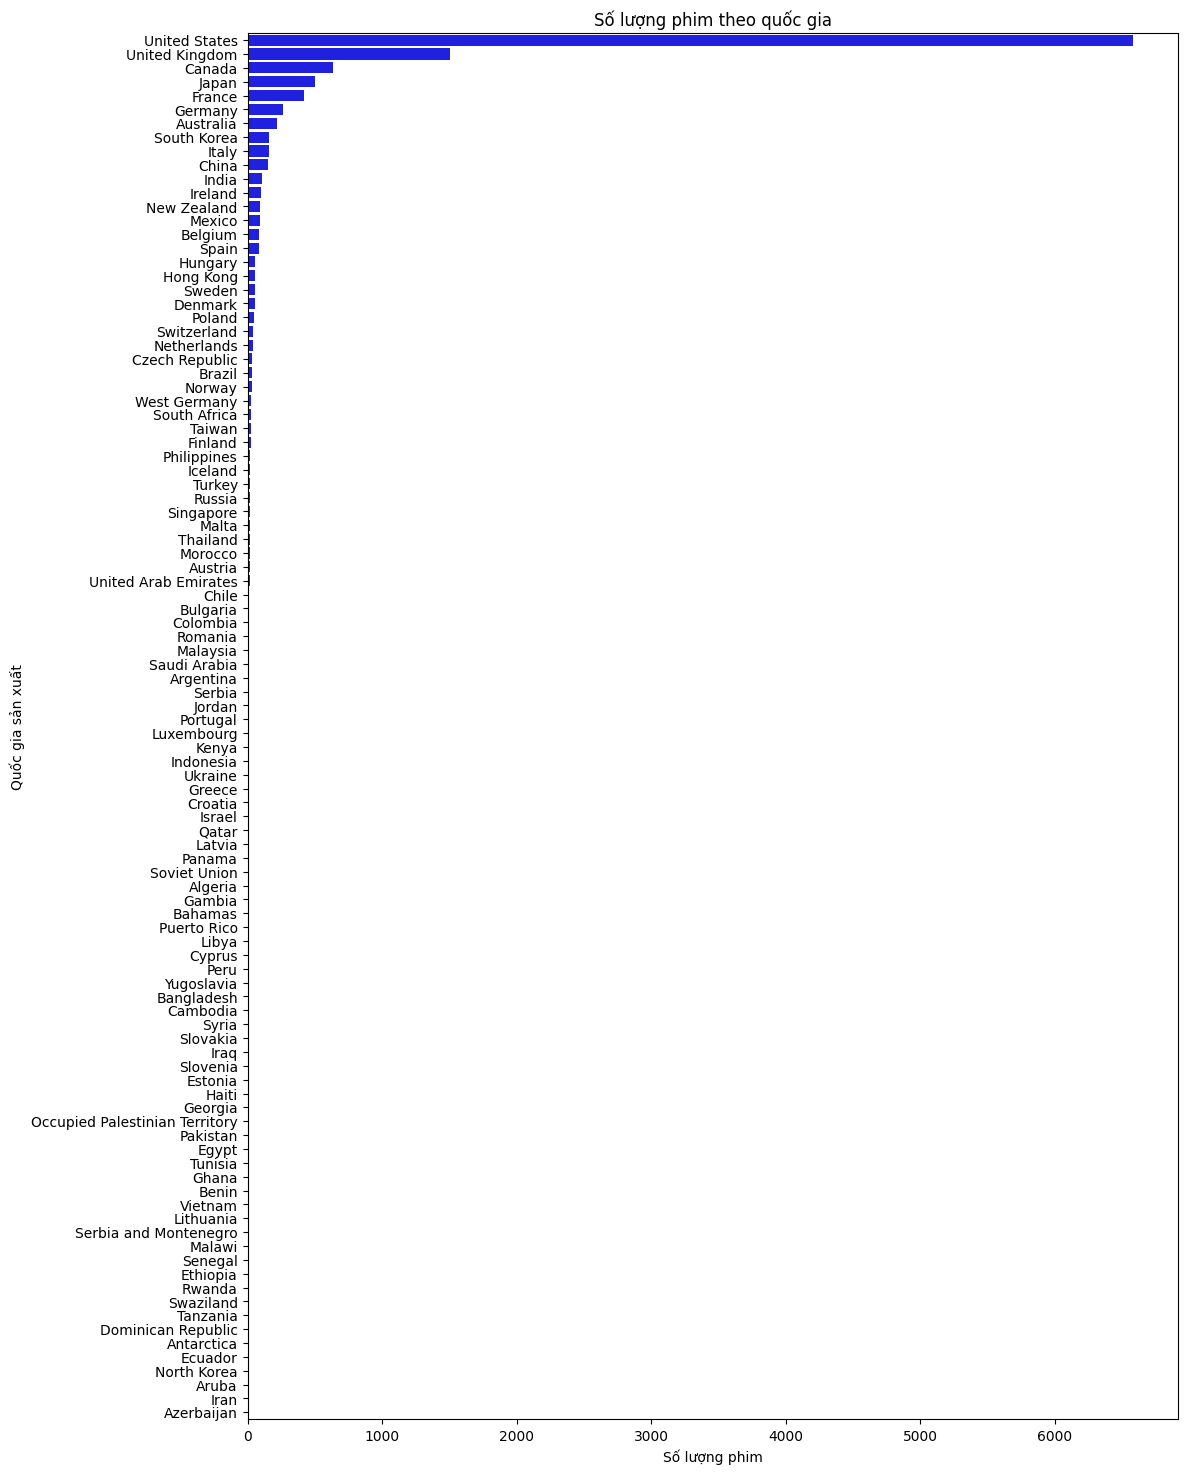

In [70]:
#Thống kê số lượng phim theo quốc gia
top_countries = df['countries'].value_counts()
plt.figure(figsize=(12, 18))
sns.barplot(x=top_countries.values, y=top_countries.index, color= 'blue')
plt.title("Số lượng phim theo quốc gia")
plt.xlabel("Số lượng phim")
plt.ylabel("Quốc gia sản xuất")
plt.show()


USA là nước sản xuất phim lớn nhất thể giới.

### Nhận xét:
- USA có tổng danh thu cao nhất nhờ có số lượng phim lơn nhất nhưng danh thu mỗi phim ko đồng đều dẫn đến danh thu trung bình ko cao. <br>

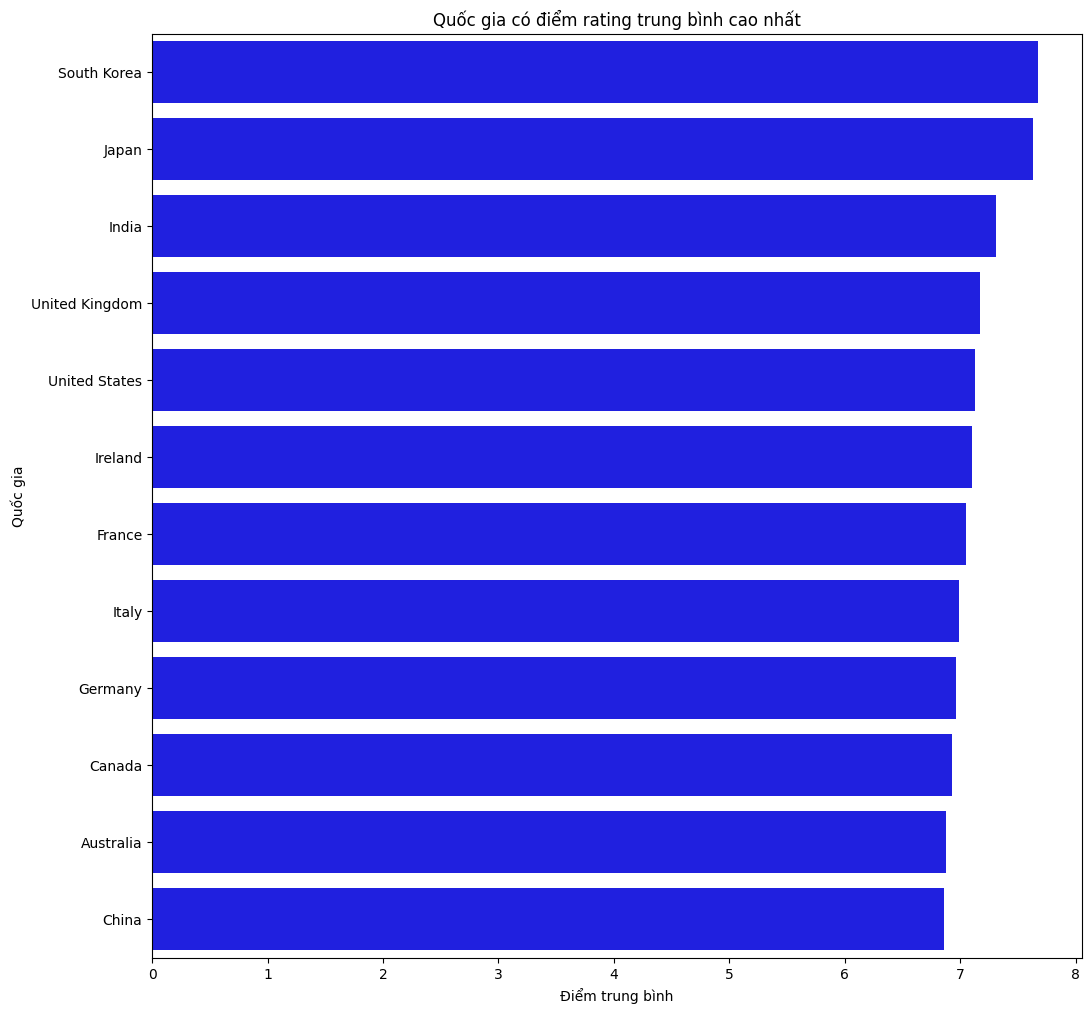

In [71]:
# Tính số lượng phim theo quốc gia
country_counts = df['countries'].value_counts()

# Lọc các quốc gia có ít nhất 100 phim
selected_countries = country_counts[country_counts >= 100].index

# Lọc dữ liệu chỉ bao gồm các quốc gia đã chọn
filtered_df = df[df['countries'].isin(selected_countries)]

# Tính rating trung bình theo quốc gia
country_ratings = filtered_df.groupby('countries')['rating'].mean().sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(12, 12))
sns.barplot(x=country_ratings.values, y=country_ratings.index, color='blue')
plt.title("Quốc gia có điểm rating trung bình cao nhất")
plt.xlabel("Điểm trung bình")
plt.ylabel("Quốc gia")
plt.show()

Tuy nhiên, điểm đánh gia cao nhất lại thuộc về các nước châu Á <br>
Chọn ra các nước có ảnh hướng lớn đến ngành công nghiệp phim để phân tích: <br>
- United States (Mỹ) <br>
- United Kingdom (Anh) <br>
- South Korea (Hàn Quốc) <br>
- Japan (Nhật Bản) <br>
- India (Ấn Độ) <br>
- France (Pháp) <br>
Việt Nam có quá ít dữ liệu

In [72]:
# Chọn ra các quốc gia tiêu biểu theo số lượng và rate
selected_countries = ['United States', 'United Kingdom', 'South Korea', 'Japan', 'India', 'France']

# Lọc dữ liệu chỉ bao gồm các quốc gia đã chọn
filtered_df = df[df['countries'].isin(selected_countries)]
filtered_df

,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
0,Attack on Titan,"Action Epic, Adult Animation, Anime, Shōnen, S...",TV Series,9.1,591000.0,NaN,2013.0,NaN,NaN,Japan,https://www.imdb.com/title/tt2560140/?ref_=sr_...,NaN,Success
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,United States,https://www.imdb.com/title/tt30788842/?ref_=sr...,-0.0,Fail
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,United States,https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.4,Success
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,Japan,https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.4,Success
3,The Equalizer,"Cop Drama, Police Procedural, Action, Crime, D...",TV Series,5.6,19000.0,NaN,2021.0,NaN,NaN,United States,https://www.imdb.com/title/tt11242246/?ref_=sr...,NaN,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,Chuka,Western,Movie,6.3,1100.0,NaN,1967.0,NaN,NaN,United States,https://www.imdb.com/title/tt0061477/?ref_=sr_...,NaN,Fail
7990,Unforgiven,"Period Drama, Tragedy, Drama, Western",Movie,8.2,451000.0,85.0,1992.0,159167799.0,14400000.0,United States,https://www.imdb.com/title/tt0105695/?ref_=sr_t_3,10.1,Success
7991,The Duel,"Drama, Western",Movie,5.8,12000.0,42.0,2016.0,20672.0,10000000.0,United States,https://www.imdb.com/title/tt2436682/?ref_=sr_...,-1.0,Fail
7992,Calamity Jane,"Classic Musical, Musical, Romance, Western",Movie,7.2,11000.0,74.0,1953.0,7150.0,NaN,United States,https://www.imdb.com/title/tt0045591/?ref_=sr_...,NaN,Success


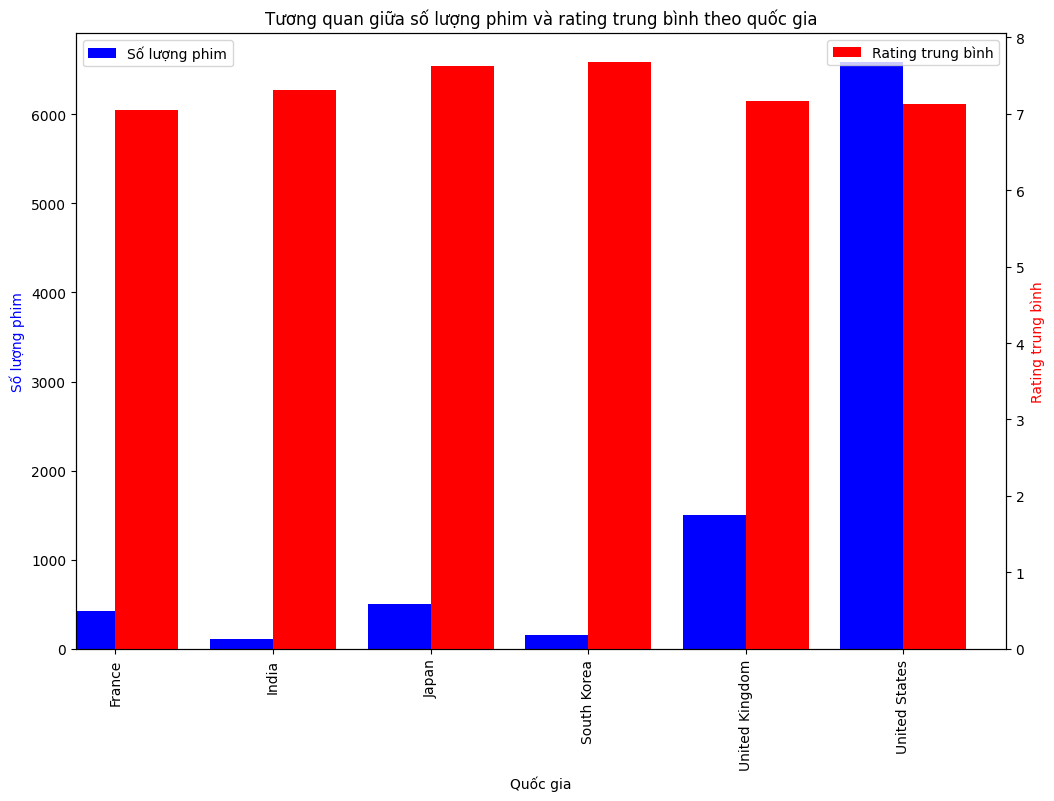

In [73]:
# Tính số lượng phim theo quốc gia
country_counts = filtered_df['countries'].value_counts()

# Tính rating trung bình theo quốc gia
country_ratings = filtered_df.groupby('countries')['rating'].mean()

# Tạo DataFrame mới từ 2 Series đã tính
country_df = pd.DataFrame({'number_of_movies': country_counts, 'average_rating': country_ratings})

# Vẽ biểu đồ cột đôi
fig, ax1 = plt.subplots(figsize=(12, 8))

# Vẽ cột số lượng phim
country_df['number_of_movies'].plot(kind='bar', color='b', ax=ax1, position=1, width=0.4, label='Số lượng phim')
ax1.set_ylabel('Số lượng phim', color='b')
ax1.set_xlabel('Quốc gia')
ax1.set_title("Tương quan giữa số lượng phim và rating trung bình theo quốc gia")

# Tạo trục y thứ hai cho rating trung bình
ax2 = ax1.twinx() # tạo cột chung với cột số lượng phim
country_df['average_rating'].plot(kind='bar', color='r', ax=ax2, position=0, width=0.4, label='Rating trung bình')
ax2.set_ylabel('Rating trung bình', color='r')

# Thêm chú thích
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Xoay tên quốc gia để hiển thị ngang
plt.xticks(rotation=0)

plt.show()

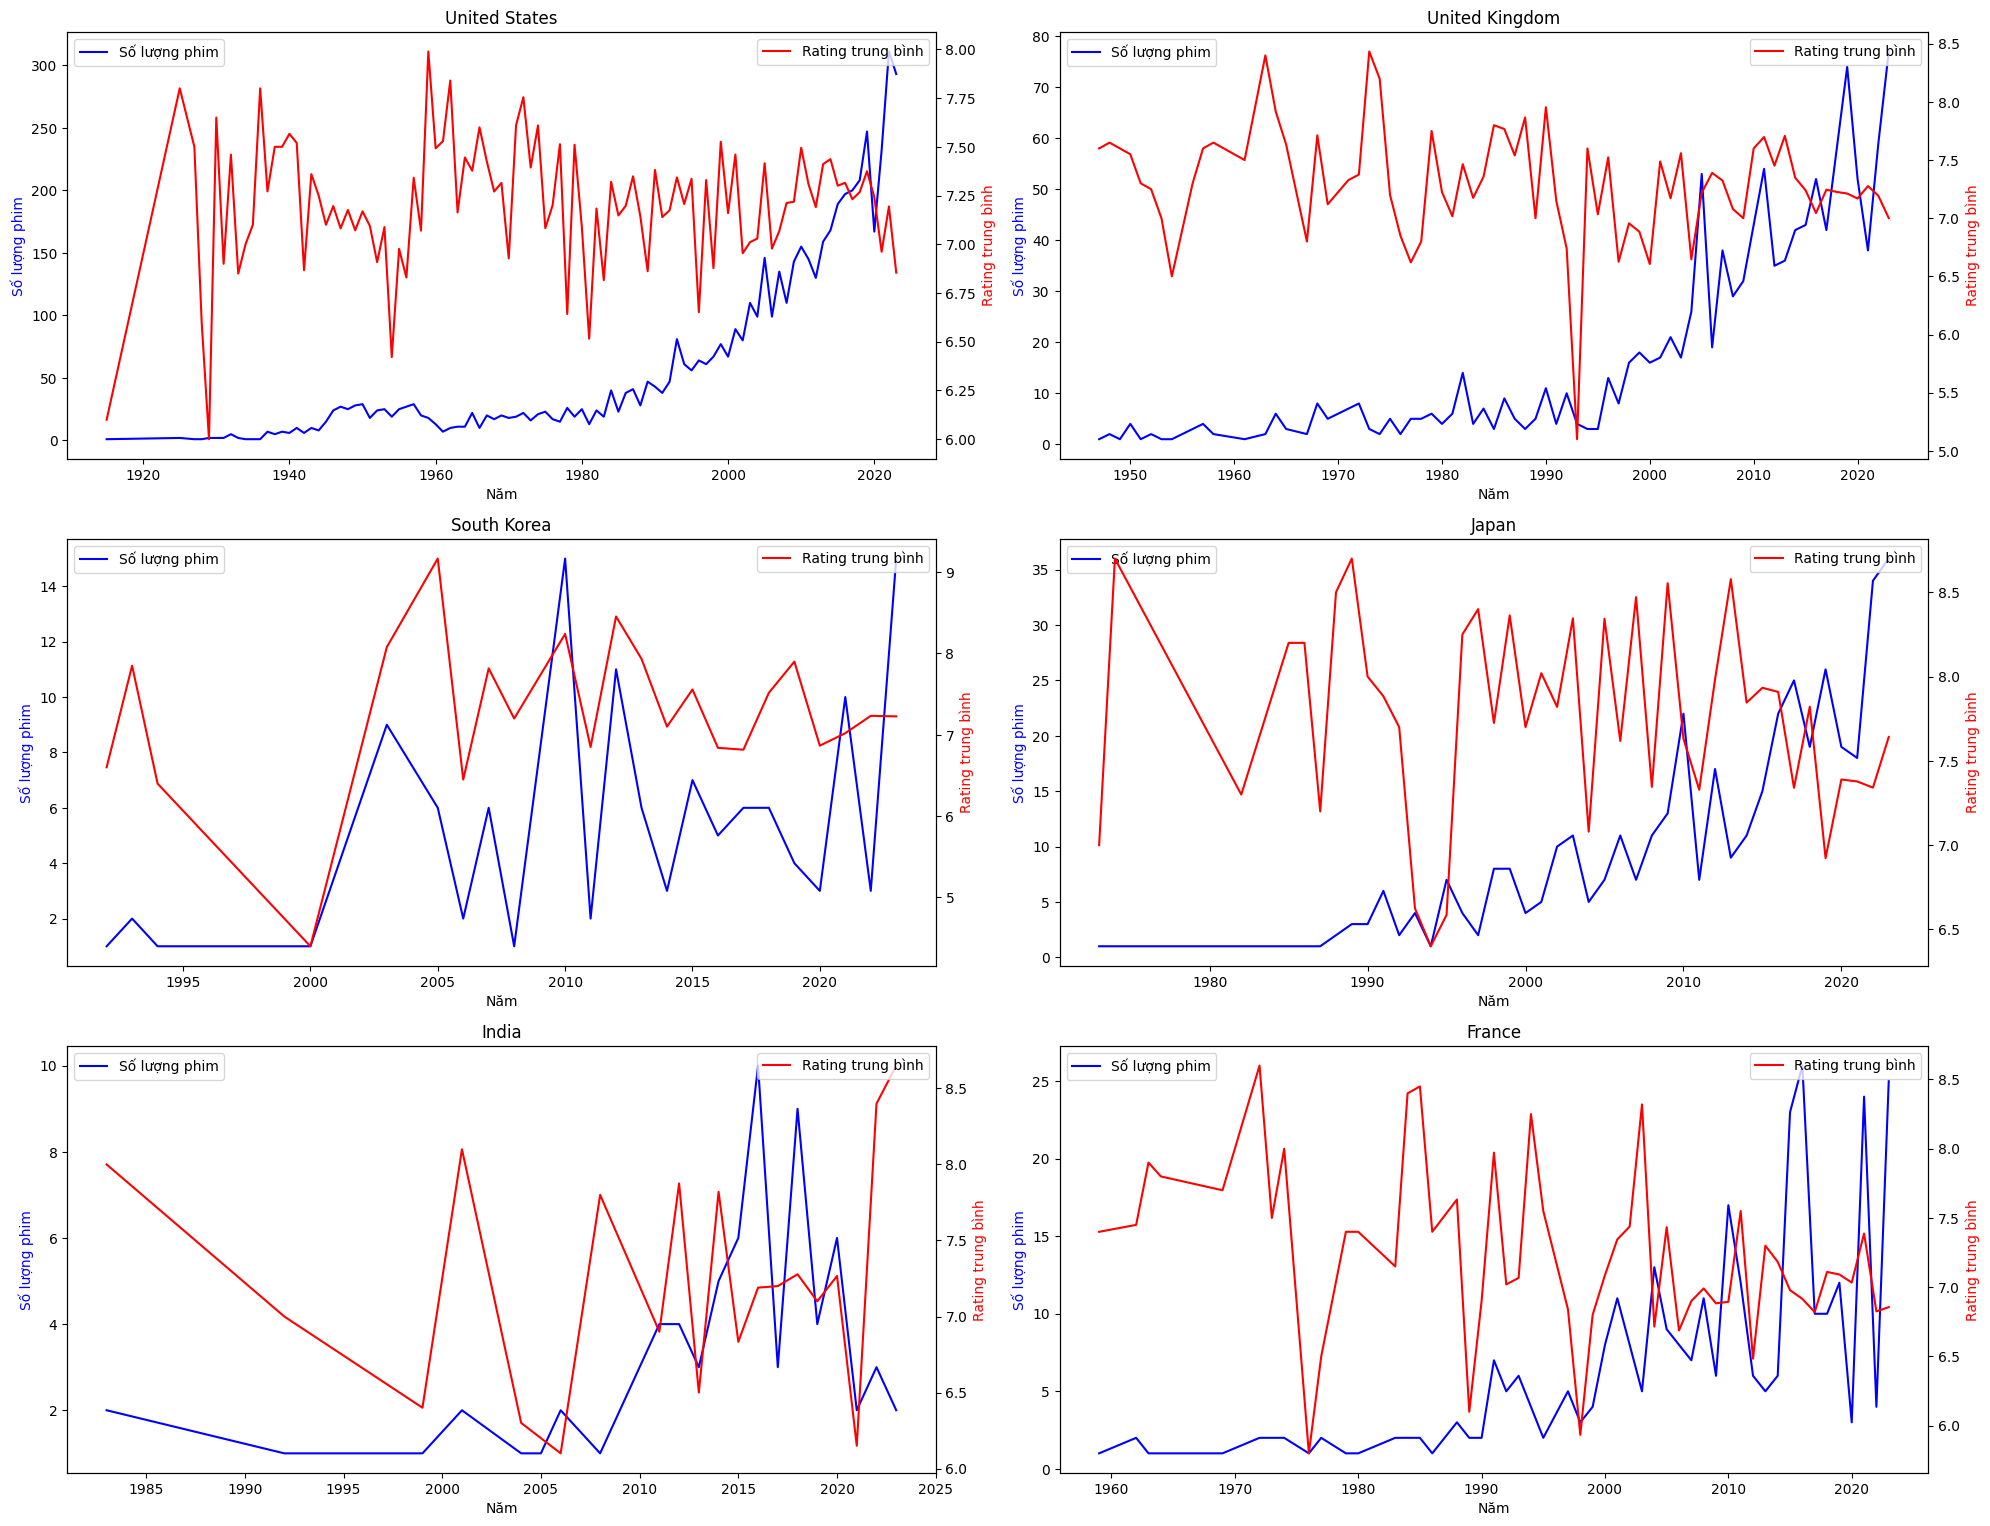

In [74]:
# Tạo một figure với các subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
axes = axes.flatten()

# Vẽ biểu đồ cho từng quốc gia
for i, country in enumerate(selected_countries):
    country_df = filtered_df[(filtered_df['countries'] == country) & (filtered_df['release_date'] < 2024)]

    # Tính số lượng phim theo năm
    year_counts = country_df.groupby('release_date').size()
    
    # Tính rating trung bình theo năm
    year_ratings = country_df.groupby('release_date')['rating'].mean()
    
    # Loại bỏ các hàng có giá trị NaN
    year_counts = year_counts.dropna()
    year_ratings = year_ratings.dropna()
    
    # Kiểm tra nếu có đủ dữ liệu để vẽ biểu đồ
    if not year_counts.empty and not year_ratings.empty:
        # Vẽ biểu đồ
        ax = axes[i]
        ax2 = ax.twinx()
        
        sns.lineplot(x=year_counts.index, y=year_counts.values, ax=ax, color='b', label='Số lượng phim')
        sns.lineplot(x=year_ratings.index, y=year_ratings.values, ax=ax2, color='r', label='Rating trung bình')
        
        ax.set_title(f'{country}')
        ax.set_xlabel('Năm')
        ax.set_ylabel('Số lượng phim', color='b')
        ax2.set_ylabel('Rating trung bình', color='r')
        
        ax.legend(loc='upper left')
        ax2.legend(loc='upper right')
    else:
        print(f"Không có đủ dữ liệu để vẽ biểu đồ cho {country}")

# Ẩn subplot thừa nếu có
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Phân tích chi tiết tùng thể loại:

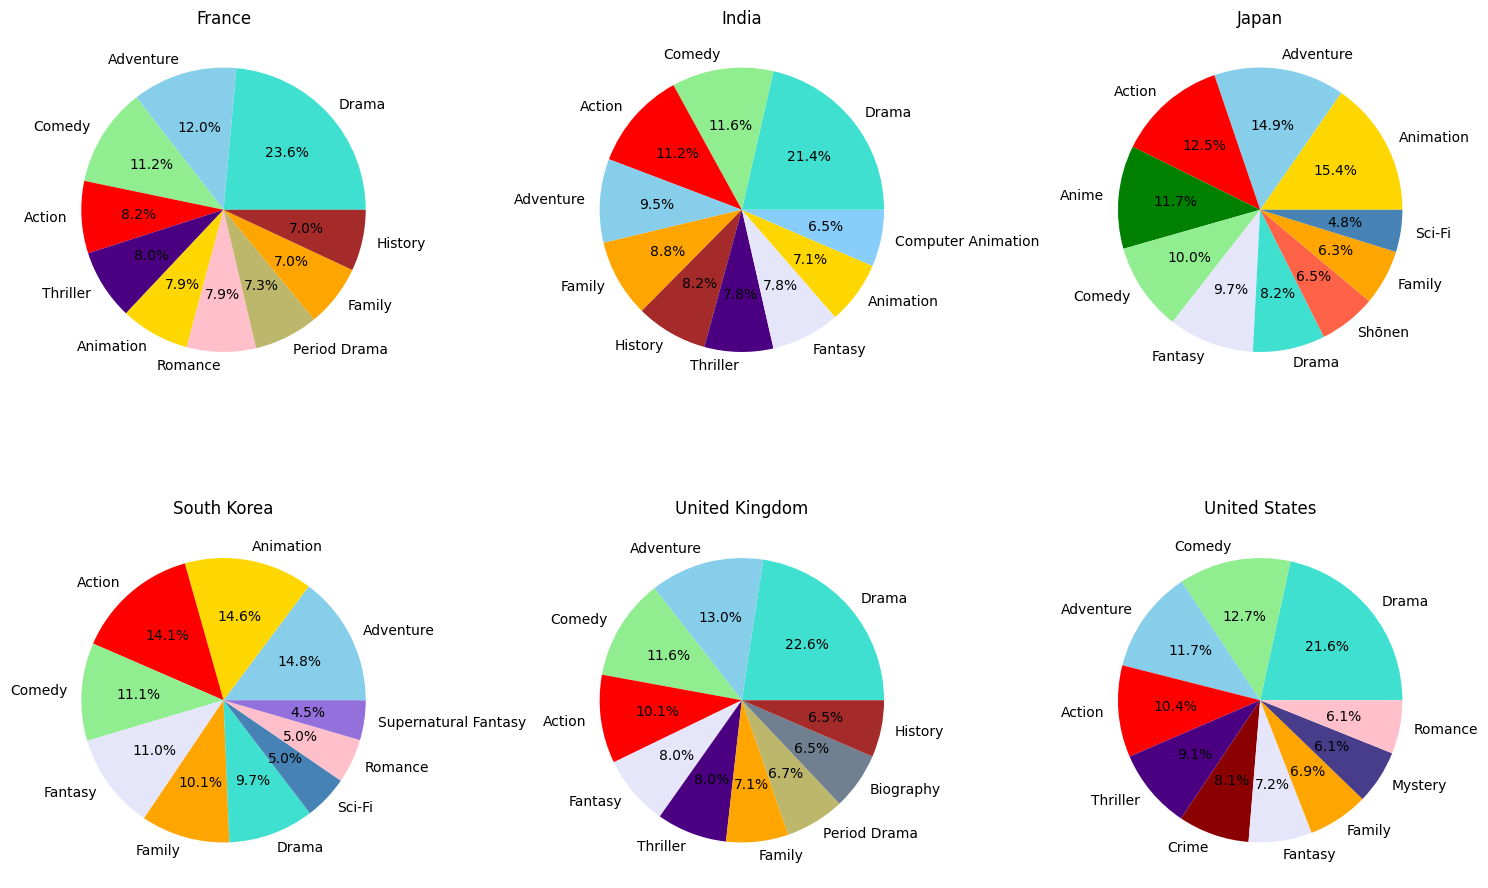

In [88]:
#Tách thể loạiloại
filtered_df['genres'] = filtered_df['genres'].str.split(', ')
filtered_df = filtered_df.explode('genres')

# Nhóm dữ liệu theo quốc gia và thể loại, sau đó đếm số lượng
genre_counts = filtered_df.groupby(['countries', 'genres']).size().unstack(fill_value=0)

# Xác định số lượng hàng và cột cho subplots
num_countries = len(genre_counts)
num_cols = 3
num_rows = int(np.ceil(num_countries / num_cols))

# Tạo dict màu cố định cho các genres
GENRE_COLORS = {
    'Action': 'Red',
    'Drama': 'Turquoise',
    'Adventure': 'SkyBlue',
    'Comedy': 'LightGreen',
    'Horror': 'Purple',
    'Western': 'Tan',
    'Animation': 'Gold',
    'Romance': 'Pink',
    'Thriller': 'Indigo',
    'Crime': 'DarkRed',
    'Documentary': 'Olive',
    'Fantasy': 'Lavender',
    'Sci-Fi': 'SteelBlue',
    'Family': 'Orange',
    'History': 'Brown',
    'Period Drama': 'DarkKhaki',
    'Biography': 'SlateGray',
    'Mystery': 'DarkSlateBlue',
    'Shōnen': 'Tomato',
    'Anime': 'Green',
    'Computer Animation': 'LightSkyBlue',
    'Supernatural Fantasy': 'MediumPurple',
    'Other' : 'Gray'
}

# Vẽ biểu đồ tròn cho từng quốc gia
fig, axes = plt.subplots(nrows= num_rows, ncols= num_cols , figsize=(15, 5 * num_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

for ax, (country, row) in zip(axes, genre_counts.iterrows()):
    # Lấy 10 thể loại phổ biến nhất
    top_genres = row.sort_values(ascending=False).head(10)
    
    # Lấy màu tương ứng cho từng genre trong data
    colors = [GENRE_COLORS.get(genre, GENRE_COLORS['Other']) for genre in top_genres.index]
    
    # Vẽ pie chart
    ax.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', colors=colors)
    ax.set_title(country)

# Ẩn các subplot thừa nếu có
for i in range(num_countries, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Kết luận:
Thể loại action và comedy được ưa chuộng ở hầu hết các quốc gia.<br>
Thể loại anime gần như chỉ có Nhật Bản sản xuất. <br>
Thể loại drama được ưa chuộng ở các quốc gia phương Tây và Ấn độ. <br>
Còn Nhật Bản và Hàn Quốc ưa chuộng thể loại Adventure (phiêu lưu) và phim hoạt hình (animation). <br>